In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sn
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering

In [2]:
df=pd.read_csv("C:/Users/agoel/Desktop/ExcelR Study Material/Clustering/crime_data.csv")

In [3]:
df

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6
5,Colorado,7.9,204,78,38.7
6,Connecticut,3.3,110,77,11.1
7,Delaware,5.9,238,72,15.8
8,Florida,15.4,335,80,31.9
9,Georgia,17.4,211,60,25.8


In [3]:
df[df.duplicated()].shape

(0, 5)

In [4]:
df.isnull().sum()

Unnamed: 0    0
Murder        0
Assault       0
UrbanPop      0
Rape          0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  50 non-null     object 
 1   Murder      50 non-null     float64
 2   Assault     50 non-null     int64  
 3   UrbanPop    50 non-null     int64  
 4   Rape        50 non-null     float64
dtypes: float64(2), int64(2), object(1)
memory usage: 2.1+ KB


In [7]:
df.describe()

,Murder,Assault,UrbanPop,Rape
count,50.00000,50.000000,50.000000,50.000000
mean,7.78800,170.760000,65.540000,21.232000
std,4.35551,83.337661,14.474763,9.366385
min,0.80000,45.000000,32.000000,7.300000
25%,4.07500,109.000000,54.500000,15.075000
50%,7.25000,159.000000,66.000000,20.100000
75%,11.25000,249.000000,77.750000,26.175000
max,17.40000,337.000000,91.000000,46.000000


<AxesSubplot:>

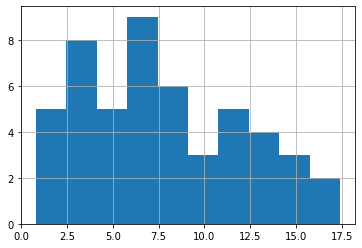

In [8]:
%matplotlib inline
df['Murder'].hist()

<AxesSubplot:>

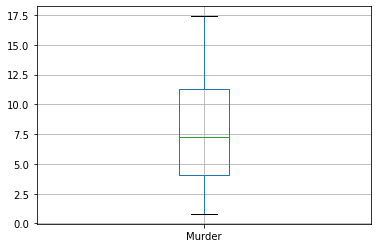

In [9]:
df.boxplot(column=['Murder'])

<AxesSubplot:>

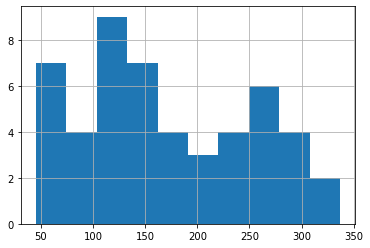

In [10]:
df['Assault'].hist()

<AxesSubplot:>

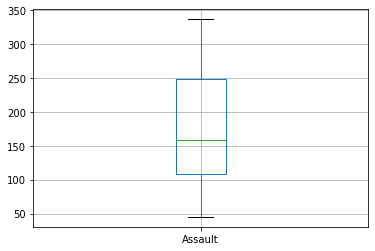

In [11]:
df.boxplot(column=['Assault'])

<AxesSubplot:>

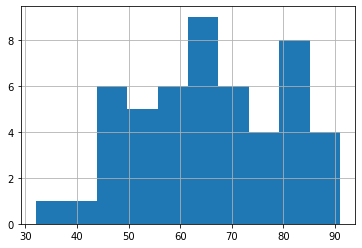

In [12]:
df['UrbanPop'].hist()

<AxesSubplot:>

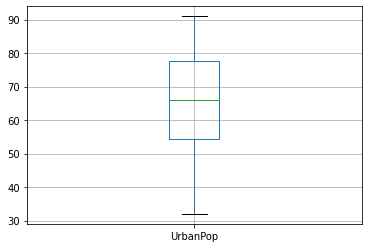

In [13]:
df.boxplot(column=['UrbanPop'])

<AxesSubplot:>

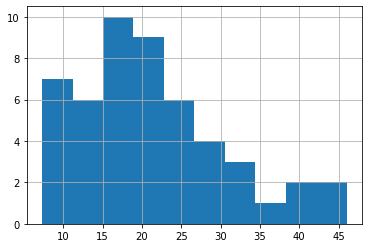

In [14]:
df['Rape'].hist()

<AxesSubplot:>

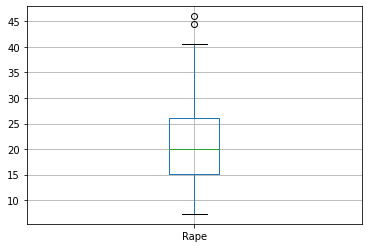

In [15]:
df.boxplot(column=['Rape'])

In [16]:
df.Rape.describe()

count    50.000000
mean     21.232000
std       9.366385
min       7.300000
25%      15.075000
50%      20.100000
75%      26.175000
max      46.000000
Name: Rape, dtype: float64

In [17]:
uf=26.175000+(1.5*(26.175000-15.075000))
uf

42.825

In [18]:
outliers = df[df.Rape>uf]
outliers

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
1,Alaska,10.0,263,48,44.5
27,Nevada,12.2,252,81,46.0


In [19]:
df1=df.drop([1,27],axis=0)

In [20]:
df1[df1.Rape>uf]

,Unnamed: 0,Murder,Assault,UrbanPop,Rape


<AxesSubplot:>

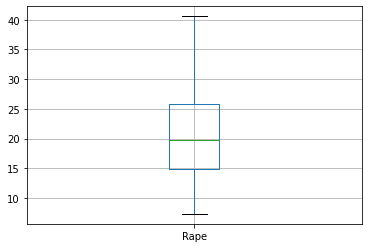

In [21]:
df1.boxplot(column=['Rape'])

In [22]:
#normalization
def norm_func(i):
    x = (i-i.min())/(i.max()-i.min())
    return (x)

In [23]:
df_norm = norm_func(df1.iloc[:,1:])

In [24]:
df_norm

,Murder,Assault,UrbanPop,Rape
0,0.746988,0.654110,0.440678,0.417417
2,0.439759,0.852740,0.813559,0.711712
3,0.481928,0.496575,0.305085,0.366366
4,0.493976,0.791096,1.000000,1.000000
5,0.427711,0.544521,0.779661,0.942943
6,0.150602,0.222603,0.762712,0.114114
7,0.307229,0.660959,0.677966,0.255255
8,0.879518,0.993151,0.813559,0.738739
9,1.000000,0.568493,0.474576,0.555556
10,0.271084,0.003425,0.864407,0.387387


# Hierarchical Clustering

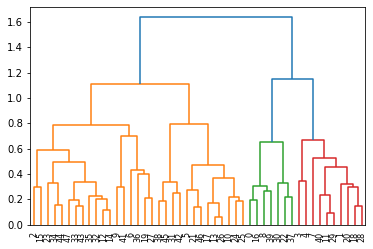

In [25]:
dendrogram=sch.dendrogram(sch.linkage(df_norm,method='complete'))

In [26]:
hc=AgglomerativeClustering(n_clusters=3,affinity='euclidean',linkage='complete')

In [27]:
y_hc = hc.fit_predict(df_norm)
Clusters=pd.DataFrame(y_hc,columns=['Clusters'])

In [28]:
df1['h_clusterid']=hc.labels_

In [29]:
df1

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,h_clusterid
0,Alabama,13.2,236,58,21.2,2
2,Arizona,8.1,294,80,31.0,1
3,Arkansas,8.8,190,50,19.5,0
4,California,9.0,276,91,40.6,1
5,Colorado,7.9,204,78,38.7,1
6,Connecticut,3.3,110,77,11.1,0
7,Delaware,5.9,238,72,15.8,0
8,Florida,15.4,335,80,31.9,1
9,Georgia,17.4,211,60,25.8,2
10,Hawaii,5.3,46,83,20.2,0


In [30]:
df1.h_clusterid.value_counts()

0    31
1    10
2     7
Name: h_clusterid, dtype: int64

In [31]:
df1.groupby('h_clusterid').agg(['mean']).reset_index()

,h_clusterid,Murder,Assault,UrbanPop,Rape
,,mean,mean,mean,mean
0,0,5.003226,116.483871,63.838710,16.338710
1,1,10.940000,265.300000,78.900000,31.280000
2,2,14.671429,251.285714,54.285714,21.685714


# K-Means

In [32]:
df2=df1.drop('h_clusterid',axis=1)
df2

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6
5,Colorado,7.9,204,78,38.7
6,Connecticut,3.3,110,77,11.1
7,Delaware,5.9,238,72,15.8
8,Florida,15.4,335,80,31.9
9,Georgia,17.4,211,60,25.8
10,Hawaii,5.3,46,83,20.2


In [33]:
from sklearn.cluster import KMeans

In [34]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_df = scaler.fit_transform(df2.iloc[:,1:])

In [35]:
scaled_df

array([[ 1.27868078,  0.83731972, -0.53291148,  0.12062732],
       [ 0.10367682,  1.54264441,  1.01311744,  1.34090882],
       [ 0.26495187,  0.27792428, -1.09510382, -0.09105417],
       [ 0.31103046,  1.32375054,  1.7861319 ,  2.53628661],
       [ 0.05759823,  0.44817506,  0.87256935,  2.29970142],
       [-1.00220926, -0.69493736,  0.80229531, -1.13700974],
       [-0.40318763,  0.86164126,  0.4509251 , -0.55177269],
       [ 1.78554524,  2.041236  ,  1.01311744,  1.45297549],
       [ 2.24633111,  0.53330046, -0.3923634 ,  0.69341251],
       [-0.5414234 , -1.47322668,  1.22393956, -0.0038912 ],
       [-1.16348432, -0.57332966, -0.81400765, -0.75100233],
       [ 0.63358057,  0.99540974,  1.22393956,  0.46927917],
       [-0.10367682, -0.65845505, -0.04099319,  0.09572361],
       [-1.25564149, -1.35161897, -0.60318553, -1.11210604],
       [-0.38014834, -0.63413351,  0.02928085, -0.27783195],
       [ 0.47230552, -0.70709814, -0.95455574, -0.48951343],
       [ 1.78554524,  0.

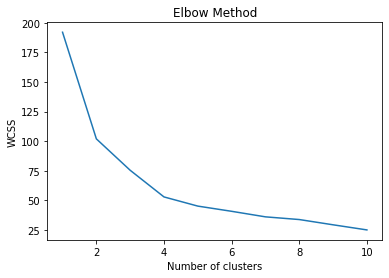

In [35]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i,random_state=0)
    kmeans.fit(scaled_df)
    wcss.append(kmeans.inertia_)
    
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [37]:
#number of cluster = squr.root of 50/2 = 5
           #or 
#cheack the point in elbow graph that it is constant after 5

In [38]:
clusters_new = KMeans(5, random_state=50)
clusters_new.fit(scaled_df)

KMeans(n_clusters=5, random_state=50)

In [39]:
clusters_new.labels_

array([3, 0, 2, 0, 0, 1, 2, 0, 3, 1, 4, 0, 2, 4, 2, 2, 3, 4, 0, 1, 0, 2,
       3, 0, 2, 2, 4, 1, 0, 0, 3, 4, 1, 2, 2, 2, 1, 3, 4, 3, 0, 1, 4, 2,
       1, 4, 4, 2])

In [40]:
df2['clusterid_new'] = clusters_new.labels_

In [41]:
clusters_new.cluster_centers_

array([[ 0.71735982,  1.097118  ,  0.8789579 ,  1.34090882],
       [-0.65949977, -0.47756359,  1.09217573, -0.25915417],
       [-0.2791299 , -0.36659656, -0.19775836, -0.23089804],
       [ 1.61768753,  1.02320578, -0.79392935,  0.18110774],
       [-1.14556487, -1.18271938, -1.14195318, -1.21587147]])

In [42]:
df2.groupby('clusterid_new').agg(['mean']).reset_index()

,clusterid_new,Murder,Assault,UrbanPop,Rape
,,mean,mean,mean,mean
0,0,10.763636,257.363636,78.090909,31.000000
1,1,4.787500,127.875000,81.125000,18.150000
2,2,6.438462,137.000000,62.769231,18.376923
3,3,14.671429,251.285714,54.285714,21.685714
4,4,2.677778,69.888889,49.333333,10.466667


# DBSCAN

In [43]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

In [44]:
df3=df1.drop('h_clusterid',axis=1)

In [60]:
df3.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6
5,Colorado,7.9,204,78,38.7


In [59]:
df4=df3.drop(['Unnamed: 0'],axis=1)
df4.head()

,Murder,Assault,UrbanPop,Rape
0,13.2,236,58,21.2
2,8.1,294,80,31.0
3,8.8,190,50,19.5
4,9.0,276,91,40.6
5,7.9,204,78,38.7


In [61]:
array=df4.values
array

array([[ 13.2, 236. ,  58. ,  21.2],
       [  8.1, 294. ,  80. ,  31. ],
       [  8.8, 190. ,  50. ,  19.5],
       [  9. , 276. ,  91. ,  40.6],
       [  7.9, 204. ,  78. ,  38.7],
       [  3.3, 110. ,  77. ,  11.1],
       [  5.9, 238. ,  72. ,  15.8],
       [ 15.4, 335. ,  80. ,  31.9],
       [ 17.4, 211. ,  60. ,  25.8],
       [  5.3,  46. ,  83. ,  20.2],
       [  2.6, 120. ,  54. ,  14.2],
       [ 10.4, 249. ,  83. ,  24. ],
       [  7.2, 113. ,  65. ,  21. ],
       [  2.2,  56. ,  57. ,  11.3],
       [  6. , 115. ,  66. ,  18. ],
       [  9.7, 109. ,  52. ,  16.3],
       [ 15.4, 249. ,  66. ,  22.2],
       [  2.1,  83. ,  51. ,   7.8],
       [ 11.3, 300. ,  67. ,  27.8],
       [  4.4, 149. ,  85. ,  16.3],
       [ 12.1, 255. ,  74. ,  35.1],
       [  2.7,  72. ,  66. ,  14.9],
       [ 16.1, 259. ,  44. ,  17.1],
       [  9. , 178. ,  70. ,  28.2],
       [  6. , 109. ,  53. ,  16.4],
       [  4.3, 102. ,  62. ,  16.5],
       [  2.1,  57. ,  56. ,   9.5],
 

In [62]:
stscaler = StandardScaler().fit(array)
X = stscaler.transform(array)

In [63]:
X

array([[ 1.27868078,  0.83731972, -0.53291148,  0.12062732],
       [ 0.10367682,  1.54264441,  1.01311744,  1.34090882],
       [ 0.26495187,  0.27792428, -1.09510382, -0.09105417],
       [ 0.31103046,  1.32375054,  1.7861319 ,  2.53628661],
       [ 0.05759823,  0.44817506,  0.87256935,  2.29970142],
       [-1.00220926, -0.69493736,  0.80229531, -1.13700974],
       [-0.40318763,  0.86164126,  0.4509251 , -0.55177269],
       [ 1.78554524,  2.041236  ,  1.01311744,  1.45297549],
       [ 2.24633111,  0.53330046, -0.3923634 ,  0.69341251],
       [-0.5414234 , -1.47322668,  1.22393956, -0.0038912 ],
       [-1.16348432, -0.57332966, -0.81400765, -0.75100233],
       [ 0.63358057,  0.99540974,  1.22393956,  0.46927917],
       [-0.10367682, -0.65845505, -0.04099319,  0.09572361],
       [-1.25564149, -1.35161897, -0.60318553, -1.11210604],
       [-0.38014834, -0.63413351,  0.02928085, -0.27783195],
       [ 0.47230552, -0.70709814, -0.95455574, -0.48951343],
       [ 1.78554524,  0.

In [90]:
dbscan = DBSCAN(eps=1.4, min_samples=8)
dbscan.fit(X)

DBSCAN(eps=1.4, min_samples=8)

In [91]:
dbscan.labels_

array([ 0, -1,  0, -1, -1,  1,  1, -1,  0,  1,  1,  1,  1,  1,  1,  1,  0,
        1,  0,  1, -1,  1,  0,  1,  1,  1,  1,  1, -1, -1, -1,  1,  1,  1,
        1,  1,  1,  0,  1,  0,  1,  1,  1,  1,  1,  1,  1,  1],
      dtype=int64)

In [93]:
cl=pd.DataFrame(dbscan.labels_,columns=['cluster'])
cl

,cluster
0,0
1,-1
2,0
3,-1
4,-1
5,1
6,1
7,-1
8,0
9,1


In [94]:
pd.concat([df3,cl],axis=1)

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,cluster
0,Alabama,13.2,236.0,58.0,21.2,0.0
1,NaN,NaN,NaN,NaN,NaN,-1.0
2,Arizona,8.1,294.0,80.0,31.0,0.0
3,Arkansas,8.8,190.0,50.0,19.5,-1.0
4,California,9.0,276.0,91.0,40.6,-1.0
5,Colorado,7.9,204.0,78.0,38.7,1.0
6,Connecticut,3.3,110.0,77.0,11.1,1.0
7,Delaware,5.9,238.0,72.0,15.8,-1.0
8,Florida,15.4,335.0,80.0,31.9,0.0
9,Georgia,17.4,211.0,60.0,25.8,1.0
